In [40]:
import os
import cv2
import matplotlib.pyplot as plt

First, checking whether I have the correct file location since I'm accessing my flashdrive.

In [43]:
images_path = "D:\images0"
labels_path = "D:\labels0"
image_files = os.listdir(images_path)
label_files = os.listdir(labels_path)
print("Files in USB cache directory:", image_files[1:10])
print("Files in USB cache directory:", label_files[1:10])

Files in USB cache directory: ['0000915.png', '0000922.png', '0000923.png', '0000925.png', '0000926.png', '0000929.png', '0000930.png', '0000983.png', '0001046.png']
Files in USB cache directory: ['0000930.txt', '0001045.txt', '0001079.txt', '0001092.txt', '0001093.txt', '0001101.txt', '0001104.txt', '0001156.txt', '0001178.txt']


Displaying images and their labels

(-0.5, 1919.5, 1079.5, -0.5)

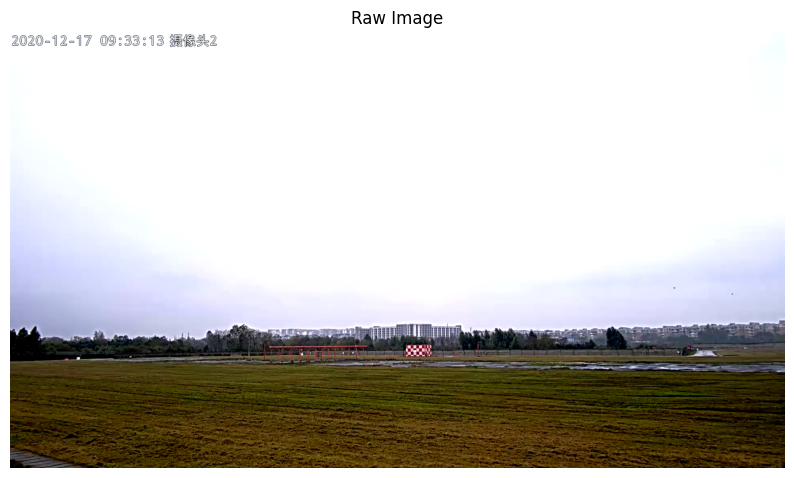

In [90]:
filename =  '0001078'
image_path = os.path.join(images_path, str(filename + '.png'))
label_path = os.path.join(labels_path, str(filename + '.txt'))

image = cv2.imread(image_path)
label = open(label_path, 'r').read()
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 15))
plt.imshow(image_rgb)
plt.title('Raw Image')
plt.axis('off')

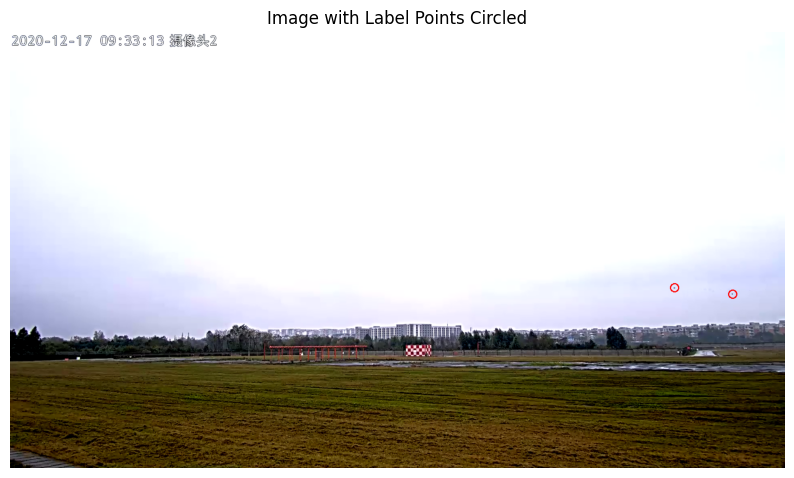

In [89]:
height, width, _ = image.shape
with open(label_path, 'r') as f:
    label_lines = f.readlines()

for entry in label_lines:
    # YOLO format: class_id, x_center, y_center, width, height (all normalized)
    values = entry.strip().split()
    class_id, x_center, y_center, bbox_width, bbox_height = map(float, values)

    x_pixel = int(x_center * width)
    y_pixel = int(y_center * height)

    circled_img = cv2.circle(image_rgb, (x_pixel, y_pixel), radius=10, color=(255, 0, 0), thickness = 2)

plt.figure(figsize=(10, 15))
plt.imshow(circled_img)
plt.title('Image with Label Points Circled')
plt.axis('off')
plt.show()

In [ ]:
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Edge detection (e.g., Canny)
    edges = cv2.Canny(blurred, threshold1=50, threshold2=150)
    
    return edges

# Example usage
image_files = [os.path.join(output_path, f) for f in os.listdir(output_path) if f.endswith('.jpg')]
preprocessed_images = [preprocess_image(img_path) for img_path in image_files[:10]]